# File Name: TP1_BJT_JRH
## Author: Brett Tully & Jack Hall
### Python 3 
#### Class: DS-160-01
##### Semester: Spring '22

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
%matplotlib inline

import statsmodels.api as sm

In [62]:
df=pd.read_csv("database.csv")
df.dtypes


df


,SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
0,100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.8974,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750
1,100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9111,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811
2,100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.9615,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500
3,100654,Alabama A&M University,0,2014,6,Men's Golf,1,2,Southwestern Athletic Conference,22,...,0.8889,0.8889,7,929,0.8571,1.0000,-99,-99,-99.0000,-99.0000
4,100654,Alabama A&M University,0,2014,13,Men's Tennis,1,2,Southwestern Athletic Conference,12,...,0.8889,0.8889,4,1000,1.0000,1.0000,6,958,1.0000,0.9167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,433660,Florida Gulf Coast University,0,2014,31,Women's Soccer,1,3,Atlantic Sun Conference,88,...,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000
6507,433660,Florida Gulf Coast University,0,2014,29,Women's Softball,1,3,Atlantic Sun Conference,71,...,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000
6508,433660,Florida Gulf Coast University,0,2014,32,Women's Swimming,1,3,Atlantic Sun Conference,84,...,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000
6509,433660,Florida Gulf Coast University,0,2014,33,Women's Tennis,1,3,Atlantic Sun Conference,28,...,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000,-99,-99,-99.0000,-99.0000


In [63]:
#Good way to start to make sure if ther is any dupes, they are gone

df=df.drop_duplicates(keep='first')


In [64]:
#Some missing values appear as -99, and we found that each row where that value found contains it more than once

df.drop(df[df['2004_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2005_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2006_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2007_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2008_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2009_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2010_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2011_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2012_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2013_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2014_RETENTION'] ==-99.0000].index, inplace=True)
df.drop('ACADEMIC_YEAR',axis=1,inplace=True)
df.drop('SCHOOL_TYPE',axis=1,inplace=True)
df = df.reset_index(drop=True)
df.sample(100) 



,SCHOOL_ID,SCHOOL_NAME,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
5191,235097,Eastern Washington University,4,Football,1,2,Big Sky Conference,306,952,0.9422,...,0.9233,0.9421,77,949,0.9659,0.9317,77,953,0.9932,0.9119
4318,218663,"University of South Carolina, Columbia",11,Men's Soccer,1,1,Southeastern Conference,85,981,0.9873,...,0.9778,0.9556,18,952,0.9688,0.9355,17,931,0.9655,0.8966
2296,170976,University of Michigan,25,Women's Golf,1,1,Big Ten Conference,32,1000,1.0000,...,1.0000,1.0000,8,1000,1.0000,1.0000,8,1000,1.0000,1.0000
3151,196079,Binghamton University,9,Men's Lacrosse,1,3,America East Conference,139,970,0.9743,...,0.9412,0.9412,25,959,0.9796,0.9388,26,933,0.9423,0.9231
5156,234076,University of Virginia,2,Men's Basketball,1,1,Atlantic Coast Conference,49,984,1.0000,...,0.8889,0.8333,11,902,0.9048,0.9000,11,977,1.0000,0.9546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,195474,Siena College,6,Men's Golf,1,3,Metro Atlantic Athletic Conference,28,991,0.9821,...,1.0000,0.9444,9,1000,1.0000,1.0000,9,1000,1.0000,1.0000
931,132903,University of Central Florida,33,Women's Tennis,1,1,American Athletic Conference,32,1000,1.0000,...,1.0000,1.0000,9,971,1.0000,0.9412,8,967,1.0000,0.9333
3118,195809,St. John's University (New York),11,Men's Soccer,1,3,Big East Conference,85,993,1.0000,...,1.0000,0.8621,19,905,0.9688,0.8387,17,983,1.0000,0.9667
1852,159717,McNeese State University,3,Men's Cross Country,1,2,Southland Conference,38,972,0.9861,...,1.0000,0.9167,6,958,1.0000,0.9167,8,967,1.0000,0.9333


In [65]:




T=df.filter(like='ATHLETES')
T.drop('FOURYEAR_ATHLETES',axis=1)
T.columns

Index(['FOURYEAR_ATHLETES', '2014_ATHLETES', '2013_ATHLETES', '2012_ATHLETES',
       '2011_ATHLETES', '2010_ATHLETES', '2009_ATHLETES', '2008_ATHLETES',
       '2007_ATHLETES', '2006_ATHLETES', '2005_ATHLETES', '2004_ATHLETES'],
      dtype='object')

In [66]:
# This is used to create the correlation matrix


conv=df[['FOURYEAR_ATHLETES','2014_ATHLETES', '2013_ATHLETES', '2012_ATHLETES',
       '2011_ATHLETES', '2010_ATHLETES', '2009_ATHLETES', '2008_ATHLETES',
       '2007_ATHLETES', '2006_ATHLETES', '2005_ATHLETES', '2004_ATHLETES']]


conv=conv.corr() 
conv

,FOURYEAR_ATHLETES,2014_ATHLETES,2013_ATHLETES,2012_ATHLETES,2011_ATHLETES,2010_ATHLETES,2009_ATHLETES,2008_ATHLETES,2007_ATHLETES,2006_ATHLETES,2005_ATHLETES,2004_ATHLETES
FOURYEAR_ATHLETES,1.000000,0.988975,0.992907,0.993494,0.989257,0.980790,0.974555,0.967060,0.959635,0.942262,0.942950,0.941914
2014_ATHLETES,0.988975,1.000000,0.979987,0.974181,0.966283,0.962779,0.958532,0.954012,0.946621,0.931021,0.931567,0.929716
2013_ATHLETES,0.992907,0.979987,1.000000,0.982473,0.973927,0.969678,0.964034,0.957148,0.950112,0.933580,0.933644,0.933709
2012_ATHLETES,0.993494,0.974181,0.982473,1.000000,0.982312,0.974573,0.968448,0.959619,0.952666,0.935216,0.936041,0.934625
2011_ATHLETES,0.989257,0.966283,0.973927,0.982312,1.000000,0.981711,0.972941,0.963393,0.955322,0.935974,0.937279,0.936382
2010_ATHLETES,0.980790,0.962779,0.969678,0.974573,0.981711,1.000000,0.981405,0.969484,0.960766,0.941954,0.941242,0.941405
2009_ATHLETES,0.974555,0.958532,0.964034,0.968448,0.972941,0.981405,1.000000,0.979183,0.967215,0.946692,0.946206,0.944585
2008_ATHLETES,0.967060,0.954012,0.957148,0.959619,0.963393,0.969484,0.979183,1.000000,0.980171,0.960080,0.957130,0.952035
2007_ATHLETES,0.959635,0.946621,0.950112,0.952666,0.955322,0.960766,0.967215,0.980171,1.000000,0.970633,0.963744,0.959224
2006_ATHLETES,0.942262,0.931021,0.933580,0.935216,0.935974,0.941954,0.946692,0.960080,0.970633,1.000000,0.973991,0.962768


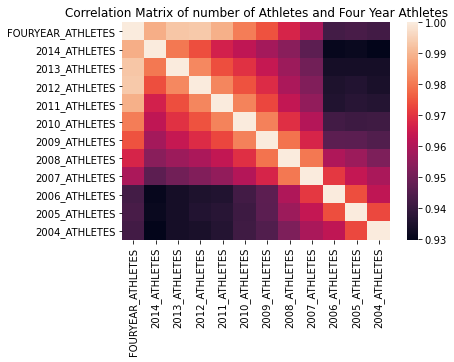

In [67]:
# Heatmap of the correlation matrix


sns.heatmap(conv)
plt.title('Correlation Matrix of number of Athletes and Four Year Athletes')
plt.savefig('Correlation-MatrixHM.png')
plt.show()

In [68]:
#Getting the average score for each year for each school

df['avg_scores']=df[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean(axis=1)
avgscore=df[['NCAA_CONFERENCE','SPORT_NAME','avg_scores','NCAA_DIVISION']]


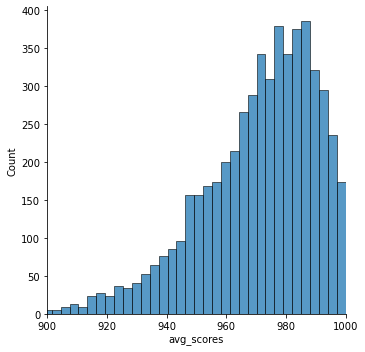

In [69]:
# Histogram of all the APR scores


sns.displot(data=df,x='avg_scores')
plt.xlim(900,1000)
plt.savefig('Distribution-of-Scores.png')

In [70]:
df['NCAA_CONFERENCE'].unique()

array(['Southwestern Athletic Conference', 'Conference USA',
       'Gulf South Conference', 'Southeastern Conference',
       'Ohio Valley Conference', 'Southern Conference',
       'Sun Belt Conference', 'Great Northwest Athletic Conference',
       'Pac-12 Conference', 'Big Sky Conference', 'Big West Conference',
       'Western Athletic Conference', 'Mountain West Conference',
       'West Coast Conference', 'Southern Collegiate Athletic Conference',
       'The Summit League', 'Northeast Conference',
       'American Athletic Conference',
       'Metro Atlantic Athletic Conference', 'America East Conference',
       'The Ivy League', 'Mid-Eastern Athletic Conference',
       'Colonial Athletic Association', 'Patriot League',
       'Atlantic 10 Conference', 'Big East Conference',
       'Atlantic Coast Conference', 'Atlantic Sun Conference',
       'Peach Belt Conference', 'Missouri Valley Conference',
       'Horizon League', 'Big Ten Conference', 'Mid-American Conference',
     

In [71]:
# Method to create a pivot table to compare sports and conferences

consport=df.groupby(['SPORT_NAME','NCAA_CONFERENCE'],as_index=False).mean()
consport.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True)







pivot=pd.pivot_table(consport,values='avg_scores',index='SPORT_NAME',columns=['NCAA_CONFERENCE'])
pivot.columns
pivot.drop(['America East Conference', 'American Athletic Conference',
       'Atlantic 10 Conference',
       
       'Big Sky Conference', 'Big South Conference',
       'Big West Conference', 'Centennial Conference',
       'Colonial Athletic Association', 'Conference USA',
       'East Coast Conference', 'Empire 8',
       'Great Lakes Intercollegiate Athletic Conference',
       'Great Northwest Athletic Conference', 'Gulf South Conference',
       'Horizon League', 'Liberty League',
       'Metro Atlantic Athletic Conference', 'Mid-American Conference',
       'Mid-Eastern Athletic Conference', 'Missouri Valley Conference',
       'Mountain West Conference', 'Northeast Conference',
       'Northeast-10 Conference', 'Northern Sun Intercollegiate Conference',
       'Ohio Valley Conference',  'Patriot League',
       'Peach Belt Conference', 'Pennsylvania State Athletic Conference',
        'Southern Collegiate Athletic Conference',
       'Southern Conference', 'Southland Conference',
       'Southwestern Athletic Conference', 'Sun Belt Conference',
       'The Summit League', 'West Coast Conference',
       'Western Athletic Conference'],inplace=True,axis=1) 


pivot


NCAA_CONFERENCE,Atlantic Coast Conference,Atlantic Sun Conference,Big 12 Conference,Big East Conference,Big Ten Conference,Pac-12 Conference,Southeastern Conference,The Ivy League
SPORT_NAME,,,,,,,,
Baseball,970.220779,943.181818,948.505051,977.935065,973.048951,961.818182,957.357143,993.443182
Football,960.945455,932.636364,945.418182,970.727273,959.785714,949.939394,954.292208,986.590909
Men's Basketball,961.939394,947.575758,951.090909,960.072727,958.441558,950.765152,947.344156,986.772727
Men's Cross Country,985.424242,980.545455,972.974026,978.090909,982.772727,975.565657,968.654545,992.386364
Men's Fencing,994.363636,NaN,NaN,962.000000,962.681818,NaN,NaN,985.469697
Men's Golf,986.049587,969.636364,977.505051,991.625000,978.558442,974.128788,979.824675,996.116883
Men's Gymnastics,NaN,NaN,986.818182,NaN,976.688312,979.500000,NaN,NaN
Men's Ice Hockey,987.363636,NaN,NaN,978.000000,979.745455,NaN,NaN,991.833333
Men's Lacrosse,984.890909,NaN,NaN,966.818182,974.386364,NaN,NaN,992.090909


In [72]:
#Filling missing values with the average of its Conference

cmean=pivot.mean()
pivot=pivot.fillna(cmean) 
pivot1=pd.DataFrame(pivot).reset_index() 
pivot

pivot.drop(["Men's Cross Country",
       "Men's Fencing","Men's Gymnastics", 
       "Men's Skiing",
        "Men's Water Polo", "Men's Wrestling",
       "Mixed Rifle", 
       "Women's Cross Country", "Women's Fencing",
      "Women's Gymnastics",
      "Women's Rowing", "Women's Skiing",
       "Women's Water Polo"],inplace=True,axis=0) 



In [ ]:
# Not exactly sure why we got such a large error message, but still got the results we were looking for


sns.pairplot(pivot1,hue='SPORT_NAME')
plt.savefig('Pairplot-of-Conferences-and-Sports.png')

/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/bretttully/opt/anaconda3/lib/python3.8/site-packages/

In [ ]:
#making the heatmap of scores of each sport vs specific conferences




sns.heatmap(pivot)
plt.title('Scores of Sport vs Main Confrences')
plt.savefig('Heatmap-of-scores-major-confrences-sports.png')


In [ ]:
# Creating a grouping by NCAA Conference



conference=(df.groupby(['NCAA_CONFERENCE'],sort=True).mean())

conference.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],inplace=True,axis=1) 
conference=conference.round(0)


conference

In [ ]:
#Seperating all the conferences from the main conferences we want to look at

main_conference=conference.drop(['America East Conference', 'American Athletic Conference',
       'Atlantic 10 Conference',
      
       'Big Sky Conference', 'Big South Conference', 
       'Big West Conference', 'Centennial Conference',
       'Colonial Athletic Association', 'Conference USA',
       'East Coast Conference', 'Empire 8',
       'Great Lakes Intercollegiate Athletic Conference',
       'Great Northwest Athletic Conference', 'Gulf South Conference',
       'Horizon League', 'Liberty League',
       'Metro Atlantic Athletic Conference', 'Mid-American Conference',
       'Mid-Eastern Athletic Conference', 'Missouri Valley Conference',
       'Mountain West Conference', 'Northeast Conference',
       'Northeast-10 Conference', 'Northern Sun Intercollegiate Conference',
       'Ohio Valley Conference','Patriot League',
       'Peach Belt Conference', 'Pennsylvania State Athletic Conference',
       'Southeastern Conference', 'Southern Collegiate Athletic Conference',
       'Southern Conference', 'Southland Conference',
       'Southwestern Athletic Conference', 'Sun Belt Conference',
        'The Summit League', 'West Coast Conference',
       'Western Athletic Conference'])
main_conference.reset_index(inplace=True)

In [ ]:
# Plotting specific Conference scores



sns.catplot(data=main_conference,x='avg_scores',y='NCAA_CONFERENCE',hue='NCAA_CONFERENCE')
plt.title('Distribution of Conference Scores')
plt.savefig('Main-Conference-Dist.png')

In [ ]:




sport=pd.DataFrame(df.groupby(['SPORT_NAME']).mean()) 
sport.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True) 
sport=sport.round(2)

sport.index 
sports=sport.drop(["Men's Cross Country",
       "Men's Fencing","Men's Gymnastics", 
       "Men's Skiing",
        "Men's Water Polo", "Men's Wrestling",
       "Mixed Rifle", 
       "Women's Cross Country", "Women's Fencing",
      "Women's Gymnastics",
      "Women's Rowing", "Women's Skiing",
       "Women's Water Polo"],axis=0,inplace=True)
sport

In [ ]:
# Pulling all the Men's and Women's sports


all_men=pd.DataFrame(sport.filter(like="Men's",axis=0))



all_women=pd.DataFrame(sport.filter(like="Women's",axis=0))

In [ ]:
# Pulling the main sports from both Men & Women


main_men=pd.DataFrame(sport.filter(like="Men's",axis=0))

main_women=pd.DataFrame(sport.filter(like="Women's",axis=0))

In [ ]:
# Creating Bar Graph comparing Men and Women

bar=pd.DataFrame()
bar['Men']=all_men.mean()
bar['Women']=all_women.mean() 

sns.barplot(data=bar)
plt.ylim(950,1000)
plt.xlabel('Scores')
plt.title('Men vs Women')
plt.savefig('men-vs-women.png')

In [ ]:
sns.heatmap(all_men)

In [ ]:
sns.heatmap(main_women) 
plt.title("Women's Sports Scores")
plt.savefig('main-women-sports-heatmap.png')


In [ ]:
sns.heatmap(main_men) 
plt.title("Men's Sports Scores")
plt.savefig('main-men-sports-heatmap.png')